In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

df = pd.read_csv('C:/Users/SOUBHIK MANDAL/Desktop/jupyter notebook/China vs India Data Analysis/Indicators.csv')
Indicator_array =  df[['IndicatorName','IndicatorCode']].drop_duplicates().values

modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        new_indicator = re.sub('[,()]',"",indicator).lower()
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)
Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()
print(Indicators.shape)

(1344, 2)


In [3]:
key_word_dict = {}
key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Food'] = ['food','grain','nutrition','calories']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['income','gdp','gni','deficit','budget','market','stock','bond','infrastructure']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment']
key_word_dict['Rural'] = ['rural','village']
key_word_dict['Urban'] = ['urban','city']

feature = 'Education'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            break

chosen_indicators = ['NE.TRD.GNFS.ZS',  \
                     'SI.POV.2DAY', 'SE.SEC.ENRL', 'SE.ADT.1524.LT.ZS', \
                     'SI.DST.10TH.10', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', \
                     'NY.GDP.PCAP.PP.KD','SP.URB.TOTL.IN.ZS', 'SH.DTH.IMRT', \
                     'NE.EXP.GNFS.KD', 'NE.IMP.GNFS.KD' ]

df_subset = df[df['IndicatorCode'].isin(chosen_indicators)]
df_India = df_subset[df['CountryName']=="India"]
df_China = df_subset[df['CountryName']=="China"]

def plot_indicator(indicator,delta=10):
    ds_India = df_India[['IndicatorName','Year','Value']][df_India['IndicatorCode']==indicator]
    try:
        title = ds_India['IndicatorName'].iloc[0]
    except:
        title = "None"

    xindia = ds_India['Year'].values
    yindia = ds_India['Value'].values
    ds_China = df_China[['IndicatorName','Year','Value']][df_China['IndicatorCode']==indicator]
    xchina = ds_China['Year'].values
    ychina = ds_China['Value'].values
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(xindia,yindia,label='India')
    plt.plot(xchina,ychina,label='China')
    plt.title(title)
    plt.legend(loc=2)
    plt.subplot(122)
    plt.plot(xindia,yindia,label='India')
    plt.plot(xchina+delta,ychina,label='China')
    plt.title(title + "\n Chinese Data Shifted by " +str(delta)+" Years")
    plt.legend(loc=2)

<ipython-input-3-6b29e3c3b67d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_India = df_subset[df['CountryName']=="India"]
<ipython-input-3-6b29e3c3b67d>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_China = df_subset[df['CountryName']=="China"]


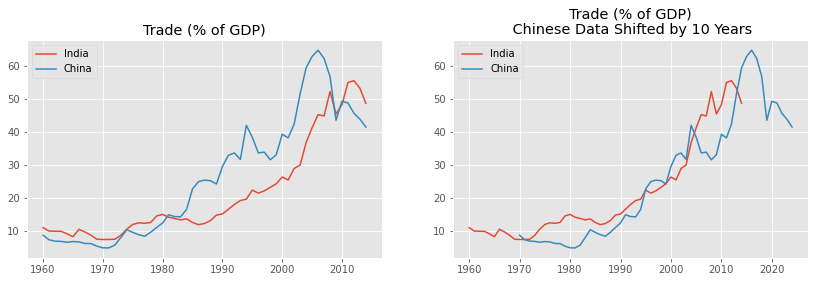

In [4]:
plot_indicator(chosen_indicators[0],delta=10)

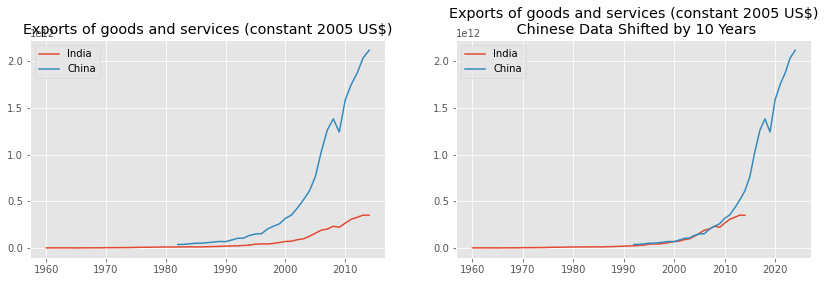

In [5]:
plot_indicator(chosen_indicators[10],delta=10)

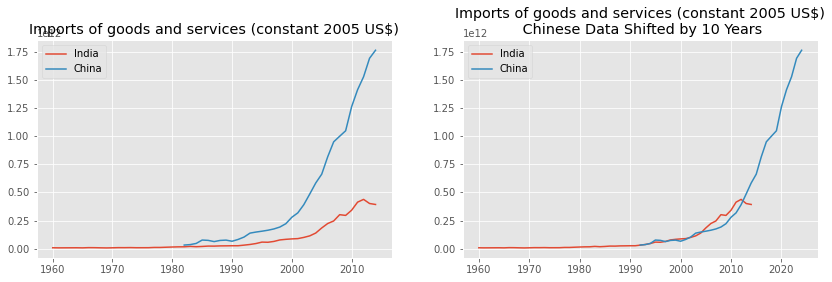

In [6]:
plot_indicator(chosen_indicators[11],delta=10)

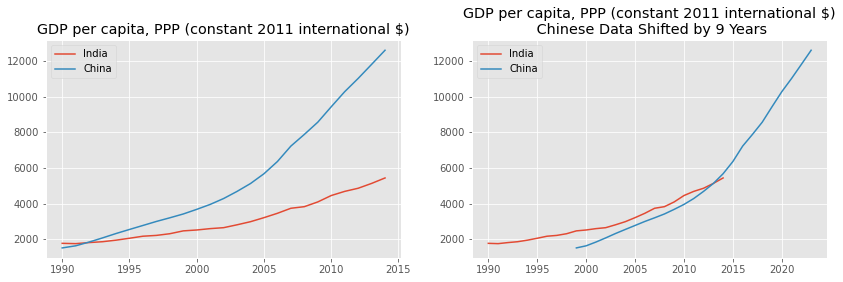

In [7]:
plot_indicator(chosen_indicators[7],delta=9)

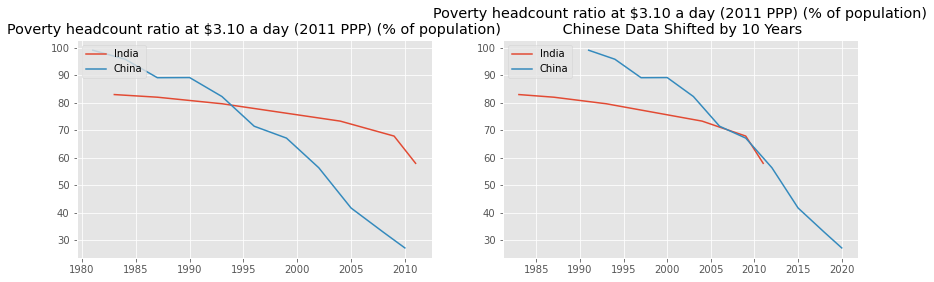

In [8]:
plot_indicator(chosen_indicators[1],delta=10)

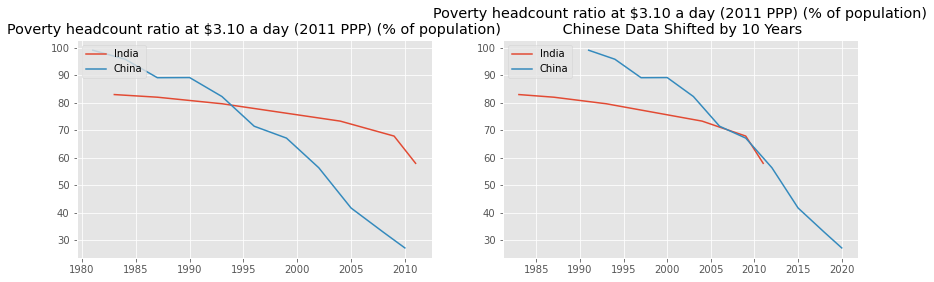

In [9]:
plot_indicator(chosen_indicators[1],delta=10)

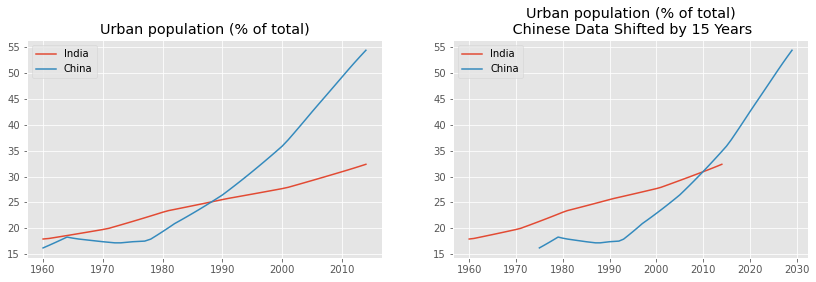

In [10]:
plot_indicator(chosen_indicators[8],delta=15)

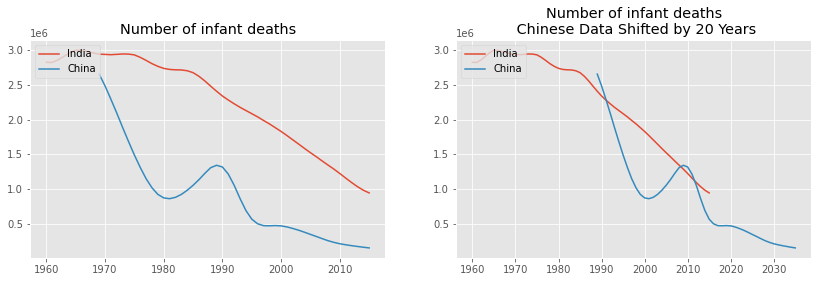

In [11]:
plot_indicator(chosen_indicators[9],delta=20)

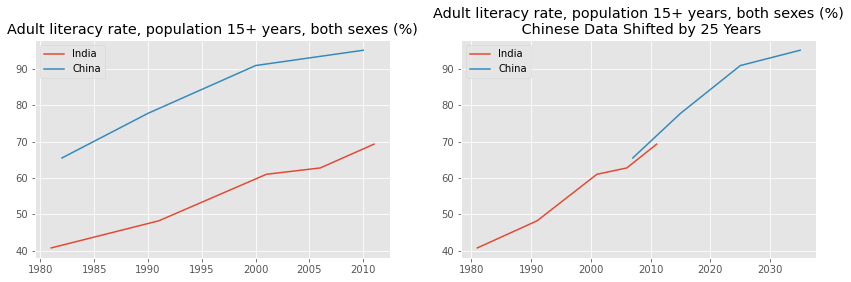

In [12]:
plot_indicator(chosen_indicators[5],delta=25)

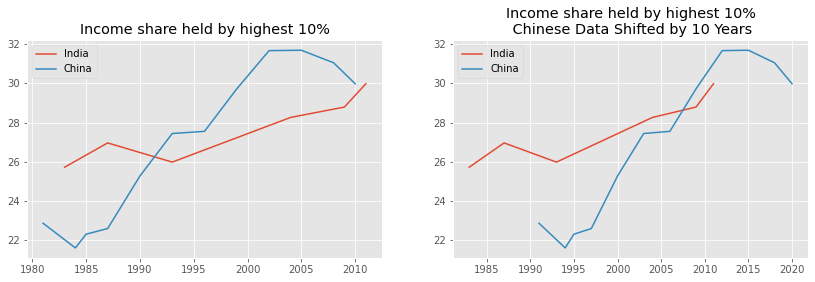

In [13]:
plot_indicator(chosen_indicators[4],delta=10)